<a href="https://colab.research.google.com/github/YashWasnik7/2022Spring_Finals/blob/main/vaccine_hesitancy_us.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Vaccine Hesitancy Analysis in the US

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Importing the required libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import functions as f

Importing the CDC data for vaccine hesitancy in the US:

In [3]:
#cdc_data = pd.read_csv("/content/drive/MyDrive/PR_finals/usa_data.csv")
# please comment the above line and uncomment the following line before running
cdc_data = pd.read_csv("Data/usa_data.csv")

In [4]:
cdc_data.head()

,FIPS Code,County Name,State,Estimated hesitant,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary
0,1131,"Wilcox County, Alabama",ALABAMA,0.23,0.11,0.93,Very High Concern,0.94,Very High Concern,0.228,0.0053,0.0009,0.0003,0.6938,0.0000,0.2684,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.52534299999999 32.132773, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
1,1129,"Washington County, Alabama",ALABAMA,0.23,0.11,0.73,High Concern,0.82,Very High Concern,0.192,0.0146,0.0731,0.0025,0.2354,0.0000,0.6495,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.45317899999999 31.505388, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
2,1133,"Winston County, Alabama",ALABAMA,0.22,0.11,0.70,High Concern,0.80,High Concern,0.085,0.0315,0.0034,0.0016,0.0073,0.0005,0.9370,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.63656399999999 34.120908, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
3,1127,"Walker County, Alabama",ALABAMA,0.23,0.11,0.75,High Concern,0.68,High Concern,0.158,0.0249,0.0015,0.0049,0.0617,0.0000,0.8895,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.56108499999999 33.868713, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
4,2013,"Aleutians East Borough, Alaska",ALASKA,0.26,0.12,0.58,Moderate Concern,0.87,Very High Concern,0.195,0.0901,0.4588,0.1968,0.0322,0.0100,0.1321,POINT (-151.631889 63.631126),AK,"MULTIPOLYGON (((-165.036163 54.576598, -165.01...","MULTIPOLYGON (((-165.254162 60.917108, -165.30..."


In [5]:
cdc_statewise = f.cdc_data_prep(cdc_data)
cdc_statewise.head()

C:\Users\dabho\PycharmProjects\2022Spring_Finals-main\functions.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(['Geographical Point', 'County Boundary', 'State Boundary'], 1)
C:\Users\dabho\PycharmProjects\2022Spring_Finals-main\functions.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  statewise_df = data.groupby("State")["State Code", "State", "low hesitancy", "high hesitancy", "svi",


,low hesitancy,high hesitancy,svi,cvac,fully vaccinated,hispanic,native,asian,black,pacific,white
State,,,,,,,,,,,
ALABAMA,0.649809,0.486520,0.790214,0.794420,0.271611,0.034864,0.005749,0.007072,0.287355,0.000269,0.648376
ALASKA,0.706740,0.479488,0.581692,0.822030,1.000000,0.053148,0.324583,0.053886,0.013293,0.005324,0.478703
ARIZONA,0.517604,0.540161,1.000000,1.000000,0.644843,0.313380,0.133180,0.013267,0.018427,0.001180,0.501993
ARKANSAS,0.618342,0.626682,0.811257,0.708926,0.267845,0.052561,0.005515,0.006661,0.160659,0.001171,0.751871
CALIFORNIA,0.213749,0.102967,0.687740,0.695850,0.408423,0.306224,0.017743,0.073066,0.029845,0.002805,0.537445


Estimated hesitant vs percentage of  fully vaccinated people per state:

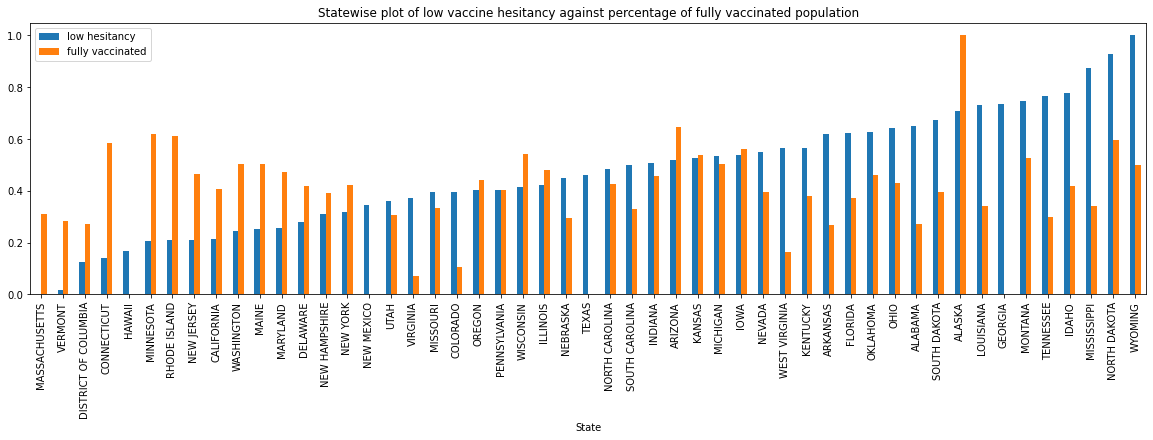

In [6]:
plot_title = "Statewise plot of low vaccine hesitancy against percentage of fully vaccinated population"
f.cdc_data_plot(cdc_statewise, 'low hesitancy', plot_title)

We cannot see any significant trends between increasing hesitancy and vaccinated population.

Estimated strongly hesitant vs percentage of  fully vaccinated people per state:

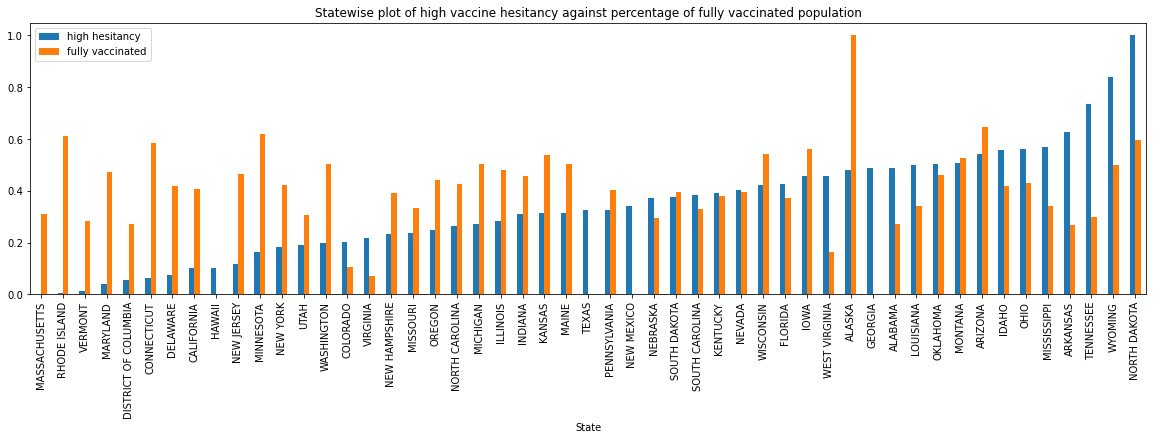

In [7]:
plot_title = "Statewise plot of high vaccine hesitancy against percentage of fully vaccinated population"
f.cdc_data_plot(cdc_statewise, 'high hesitancy', plot_title)

We cannot see any significant trends between increasing high hesitancy and vaccinated population.

Social Vulnerability Index (SVI) vs percentage of fully vaccinated people per state:

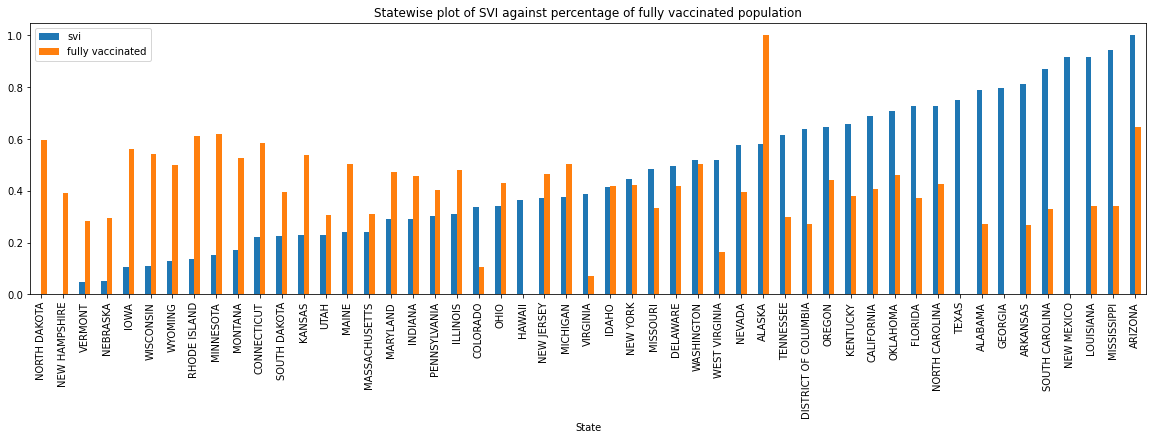

In [8]:
plot_title = "Statewise plot of SVI against percentage of fully vaccinated population"
f.cdc_data_plot(cdc_statewise, 'svi', plot_title)

States with lower SVI (upto Maine) have higher vaccinated population compared to the states with higher SVI.

COVID-19 Vaccine Coverage (CVAC) vs percentage of fully vaccinated people per state:

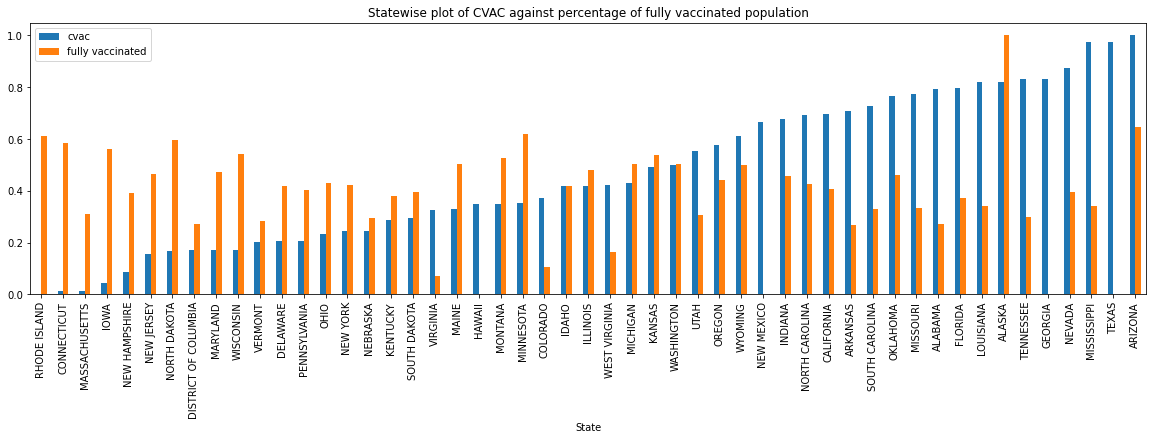

In [9]:
plot_title = "Statewise plot of CVAC against percentage of fully vaccinated population"
f.cdc_data_plot(cdc_statewise, 'cvac', plot_title)

There are some states with low CVAC that have have higher vaccinated population than the states on the higher end of CVAC index.

Percentage of people vaccinated per state:

<AxesSubplot:title={'center':'Statewise percentage of people fully vaccinated'}, xlabel='State'>

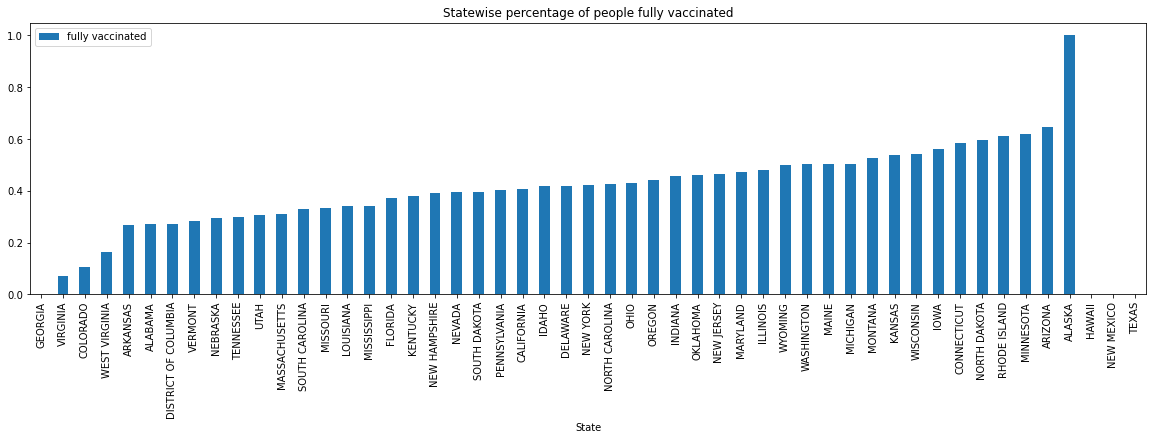

In [10]:
plot_title = "Statewise percentage of people fully vaccinated"
cdc_statewise[['fully vaccinated']].sort_values('fully vaccinated').plot(title = plot_title, kind = 'bar', figsize=(20,5))

# Time series plot for COVID-19 cases in India and the US:

Importing the world COVID-19 daily cases data:

In [11]:
#data = pd.read_csv("/content/drive/MyDrive/PR_finals/worldometer_coronavirus_daily_data.csv")
# please comment the above line and uncomment the following line before running
data = pd.read_csv("Data/worldometer_coronavirus_daily_data.csv")

In [12]:
cases_monthwise_india = f.covid_data_prep(data, 'India')
cases_monthwise_india.head()

,month,year,daily_new_cases,month_year
2,2,2020,0.0,2020-2
5,3,2020,1394.0,2020-3
8,4,2020,33466.0,2020-4
10,5,2020,155746.0,2020-5
12,6,2020,395183.0,2020-6


In [13]:
cases_monthwise_usa = f.covid_data_prep(data, 'USA')
cases_monthwise_usa.head()

,month,year,daily_new_cases,month_year
2,2,2020,53.0,2020-2
5,3,2020,210536.0,2020-3
8,4,2020,919272.0,2020-4
10,5,2020,758696.0,2020-5
12,6,2020,905280.0,2020-6


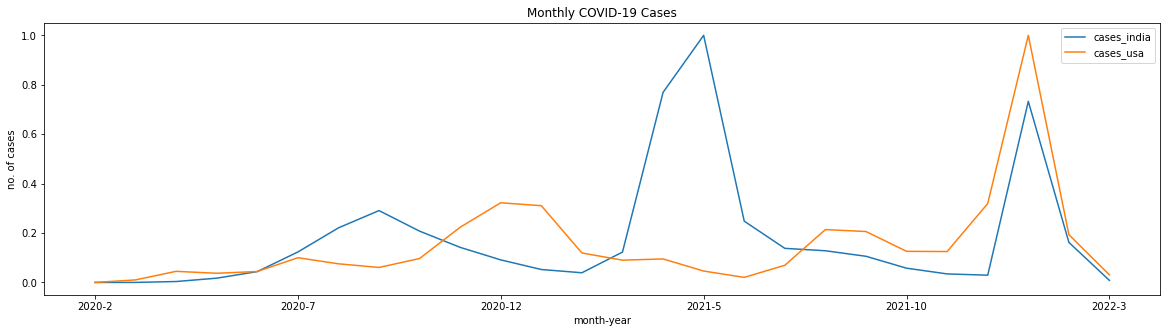

In [14]:
f.covid_data_plot(cases_monthwise_india, cases_monthwise_usa, 'india', 'usa')

The plot depicts the trends in monthly COVID-19 cases in India and US. The peaks are the COVID-19 waves. The first and second peaks in the line plot coincide with the first and second waves in India and US.

# Time series plot for vaccine doses administered in India and the US:

Importing the dataset:

In [15]:
india_col = ['Updated On', 'Total Doses Administered', 'Male (Individuals Vaccinated)', 'Female (Individuals Vaccinated)', 'Transgender (Individuals Vaccinated)']
#india_vax = pd.read_csv("/content/drive/MyDrive/PR_finals/cowin_vaccine_data_statewise.csv", usecols = india_col)
# please comment the above line and uncomment the following line before running
india_vax = pd.read_csv("Data/cowin_vaccine_data_statewise.csv", usecols = india_col)


usa_col = ['Date', 'Total Doses Administered Daily']
#usa_vax = pd.read_csv("/content/drive/MyDrive/PR_finals/trends_in_number_of_covid19_vaccinations_in_the_us.csv", usecols = usa_col)
# please comment the above line and uncomment the following line before running
usa_vax = pd.read_csv("Data/trends_in_number_of_covid19_vaccinations_in_the_us.csv", usecols = usa_col)

In [16]:
india_monthwise = f.vaccine_data_prep(india_vax, 'India')

In [17]:
usa_monthwise = f.vaccine_data_prep(usa_vax, 'USA')

In [18]:
india_monthwise.head()

,month,year,Total Doses Administered,Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated),month_year
0,1,2021,3.865919e+09,4.024820e+08,3.726244e+08,108286.0,2021-1
1,2,2021,4.222649e+09,5.551354e+08,5.037422e+08,143577.0,2021-2
2,3,2021,5.687052e+09,1.209493e+09,1.058344e+09,270630.0,2021-3
3,4,2021,8.697618e+09,2.515578e+09,2.298128e+09,621472.0,2021-4
4,5,2021,1.135651e+10,3.469072e+09,3.074867e+09,961420.0,2021-5


In [19]:
usa_monthwise.head()

,month,year,Total Doses Administered Daily,month_year
0,1,2021,32129505,2021-1
1,1,2022,28100892,2022-1
2,2,2021,49992053,2021-2
3,2,2022,10914732,2022-2
4,3,2021,84217699,2021-3


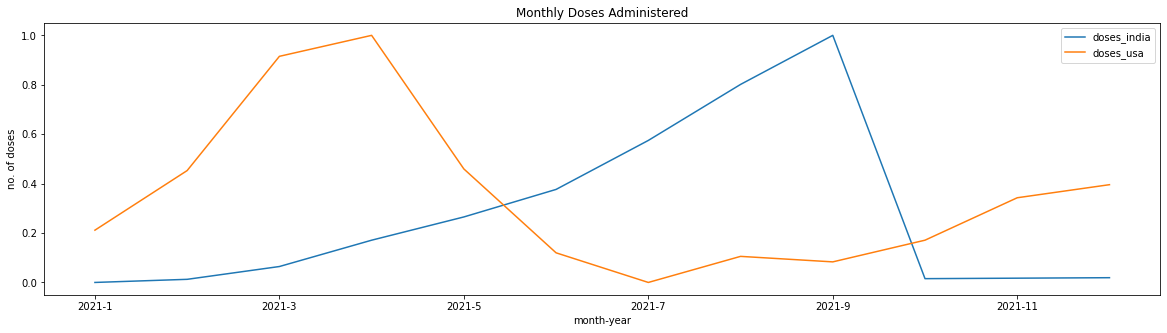

In [20]:
f.vaccine_data_plot(india_monthwise, usa_monthwise, 'india', 'usa')

High number of doses were administered in the US compared to India when the vaccine was initially made available to the public. In India, the numbers were lower earlier and later picked up the pace.

# Vaccination trends of males, females and transgender people in India:


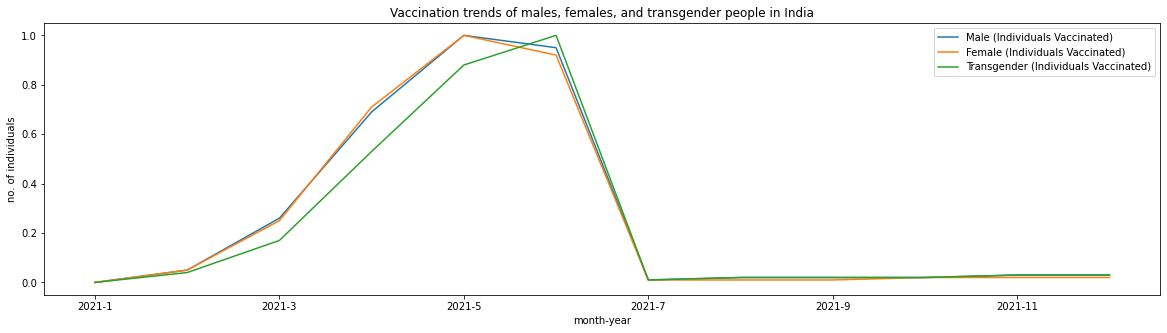

In [21]:
f.vaccine_gender_plot(india_monthwise)

The trends for males and females are similar, but the number of transpeople vaccinated is always lower than both.